In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta as td
import datetime
import seaborn as sns
from datetime import datetime
sns.set(style="dark")
from scipy import stats as stats

import pandas as pd
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split


from IPython.display import Markdown, display    

In [ ]:
# def printmd(string):
#     display(Markdown(string))

In [403]:
#Read data
mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv ('vehicles.csv',parse_dates=['posting_date'])
#Peek
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [88]:
#df.info()
#Check columns list
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [404]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df['posting_date'] = pd.to_datetime(df.posting_date).dt.tz_localize(None)
df.dtypes

id                       int64
url                     object
region                  object
region_url              object
price                    int64
year                   float64
manufacturer            object
model                   object
condition               object
cylinders               object
fuel                    object
odometer               float64
title_status            object
transmission            object
VIN                     object
drive                   object
size                    object
type                    object
paint_color             object
image_url               object
description             object
county                 float64
state                   object
lat                    float64
long                   float64
posting_date    datetime64[ns]
dtype: object

In [405]:
df1 = df.drop(['county', 'id','url','region_url','lat','long','image_url','VIN','description'], axis = 1)
#drop non primarily important columns
df1.isnull().sum()
#check null columns
#df1.columns

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
posting_date        68
dtype: int64

In [256]:
# df2 = df1.dropna()
# df2.info()
len(df1.index)
#check length after

426880

In [406]:
df1['age']=df1['posting_date'].dt.year -df1['year']

In [408]:
df2=df1.copy(deep=True)
df3=df1.copy(deep=True)

#df has original data
#df1 has workable data
#we work on df2 data
#make copies

#df3.dropna(subset=['condition'])

In [409]:
# corr_matrix = df2.corr('spearman').round(4)
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

df3.dropna(inplace=True)
df3.drop(['region'], axis = 1,inplace=True)
df3.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date,age
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03 19:02:03,8.0
55,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,al,2021-04-29 22:19:18,17.0
59,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,al,2021-04-27 17:20:01,9.0
65,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,al,2021-04-26 16:15:36,20.0
73,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,al,2021-04-24 23:39:59,4.0


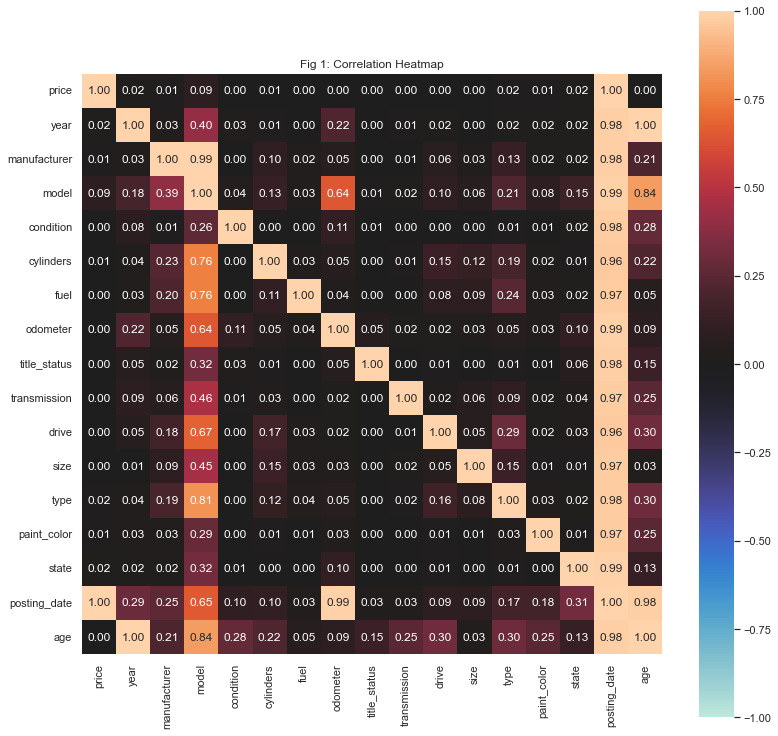

{'corr':                  price      year  manufacturer     model  condition  \
 price         1.000000  0.017358      0.010702  0.093421   0.002120   
 year          0.017358  1.000000      0.029106  0.398840   0.026913   
 manufacturer  0.010702  0.033220      1.000000  0.994236   0.003368   
 model         0.093421  0.179798      0.392689  1.000000   0.040063   
 condition     0.002120  0.077417      0.008487  0.255646   1.000000   
 cylinders     0.007231  0.038265      0.227788  0.759066   0.003933   
 fuel          0.003103  0.030210      0.203994  0.760425   0.003811   
 odometer      0.000620  0.216714      0.049878  0.644391   0.107236   
 title_status  0.001133  0.049249      0.019387  0.316737   0.030682   
 transmission  0.001488  0.089775      0.062093  0.463989   0.012794   
 drive         0.003950  0.049993      0.177778  0.674169   0.003358   
 size          0.004478  0.005856      0.088906  0.448083   0.002132   
 type          0.015088  0.036129      0.191112  0.80551

In [410]:
#Check Correlation

#should date columns be numerical???
categorical_features=identify_nominal_columns(df3)
associations(df3,nominal_columns=categorical_features, numerical_columns=['price','odometer','age'], 
             clustering=False, num_num_assoc='pearson', nom_nom_assoc='theil', figsize=(13, 13),title='Fig 1: Correlation Heatmap')

In [ ]:
#EDA

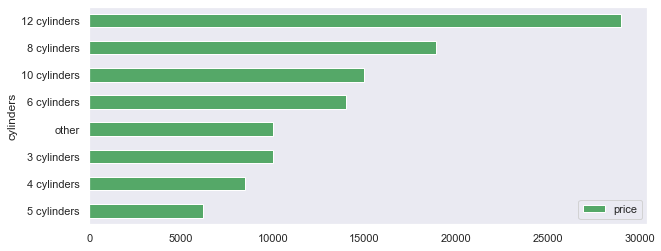

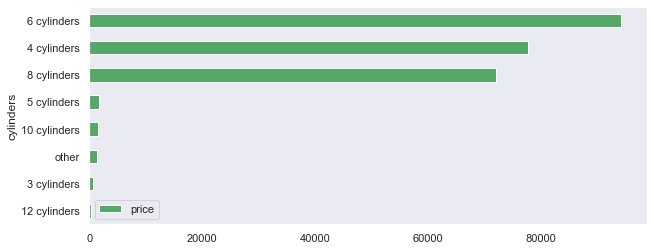

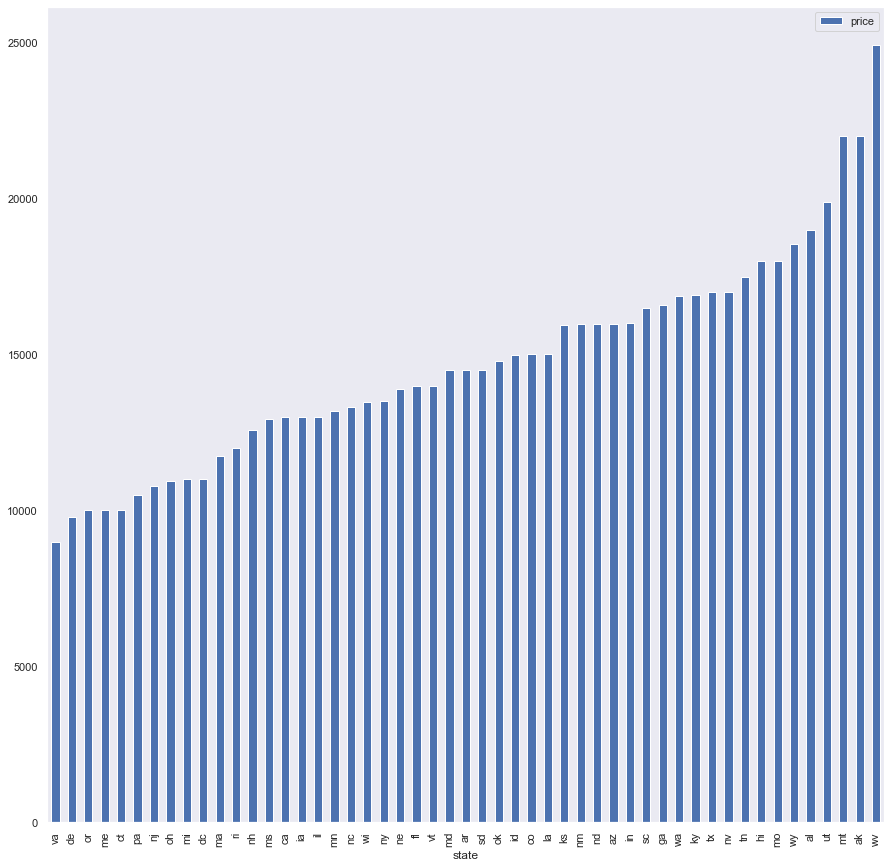

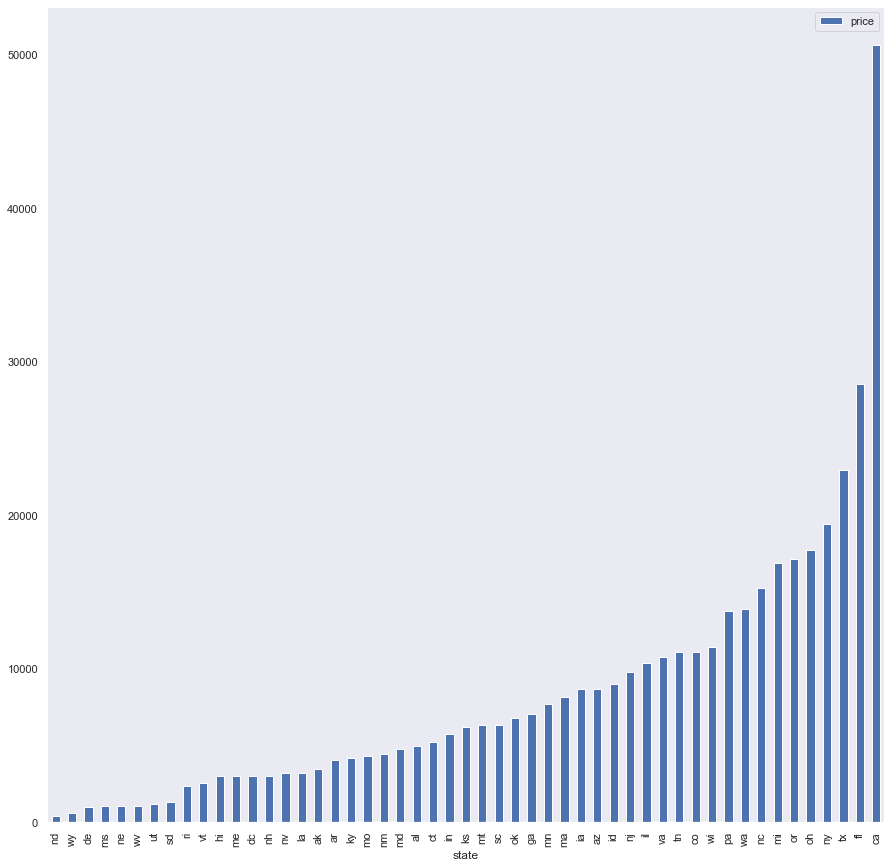

In [179]:
# what are the factors influencing pricing? 
df2[['price','cylinders']].groupby(by = 'cylinders').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (10,4))
                                                                                    
#plt.show()

df2[['price','cylinders']].groupby(by = 'cylinders').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (10,4))
                                                                                    
#plt.show()                                                                                    


df2[['price','state']].groupby(by = 'state').median().sort_values("price").plot(kind = "bar",
                                                                                     color = "b",figsize = (15,15))
#plt.show()

df2[['price','state']].groupby(by = 'state').count().sort_values("price").plot(kind = "bar",
                                                                                     color = "b",figsize = (15,15))
plt.show()

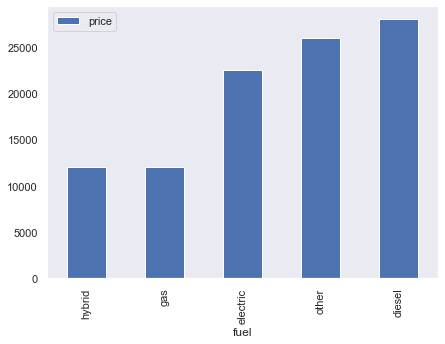

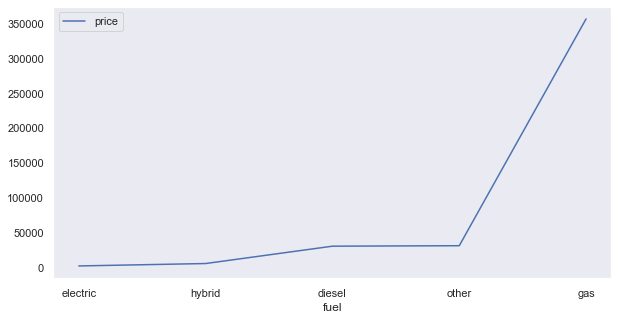

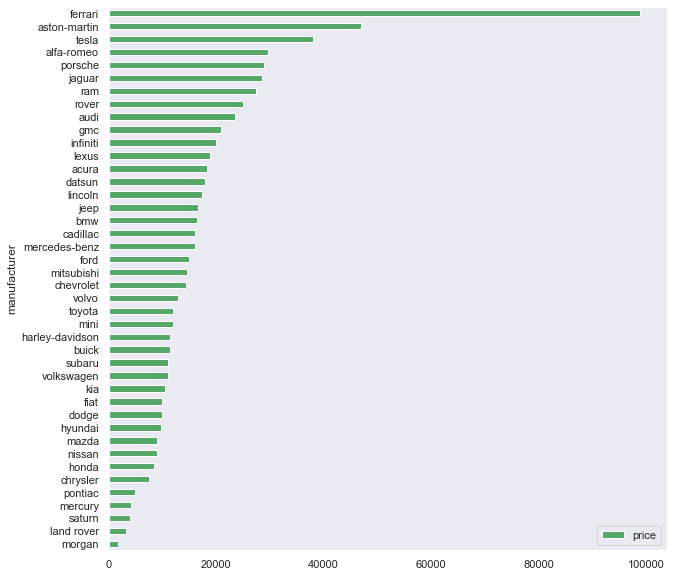

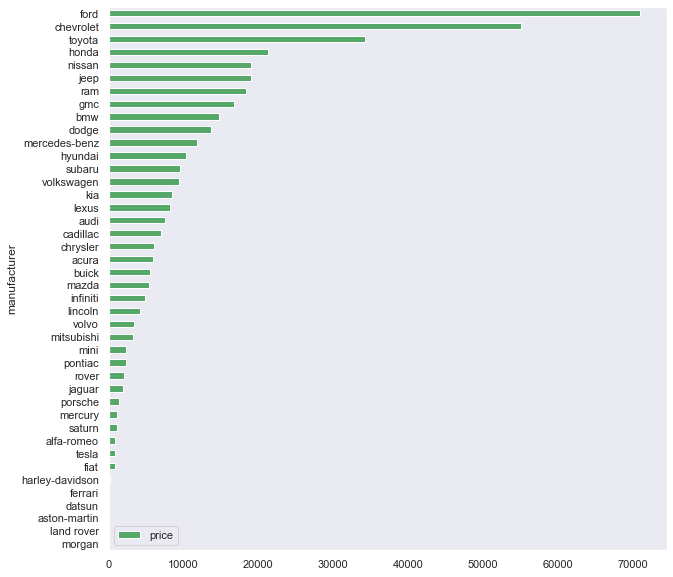

In [166]:
df2[['price','fuel']].groupby(by = 'fuel').median().sort_values("price").plot(kind = "bar",
                                                                                     color = "b",figsize = (7,5))
df2[['price','fuel']].groupby(by = 'fuel').count().sort_values("price").plot(kind = "line",
                                                                                     color = "b",figsize = (10,5))
#plt.show()

df2[['price','manufacturer']].groupby(by = 'manufacturer').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (10,10))                                                                                
#plt.show()

df2[['price','manufacturer']].groupby(by = 'manufacturer').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (10,10))                                                                                   
plt.show()

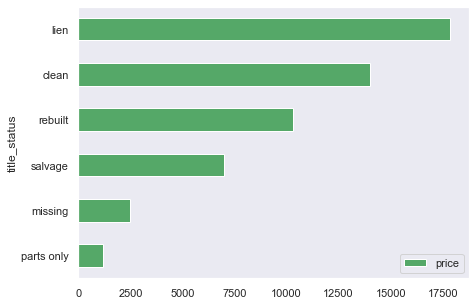

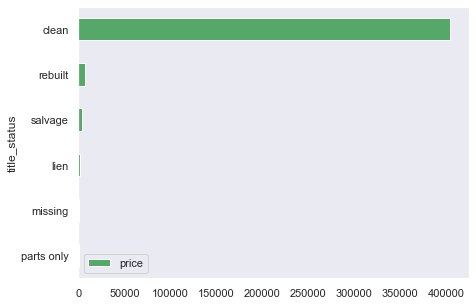

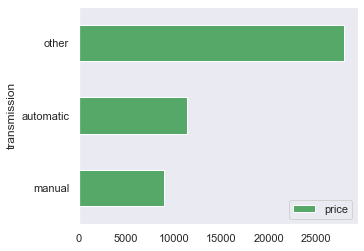

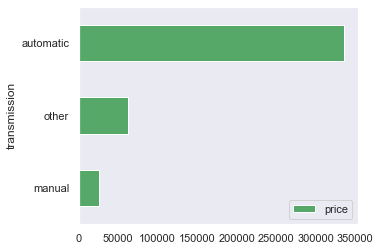

In [170]:
df2[['price','title_status']].groupby(by = 'title_status').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (7,5))                                                                                  
#plt.show()

df2[['price','title_status']].groupby(by = 'title_status').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (7,5))                                                                                  
#plt.show()

df2[['price','transmission']].groupby(by = 'transmission').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (5,4))                                                                                  
#plt.show()

df2[['price','transmission']].groupby(by = 'transmission').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (5,4))                                                                                  
plt.show()

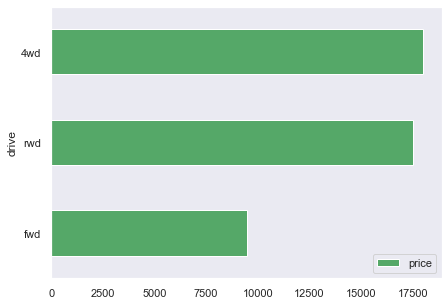

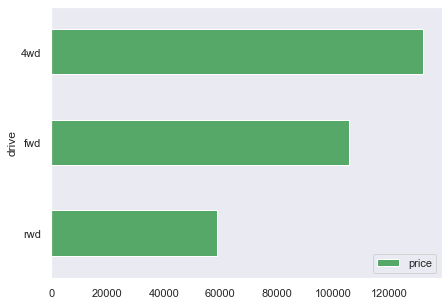

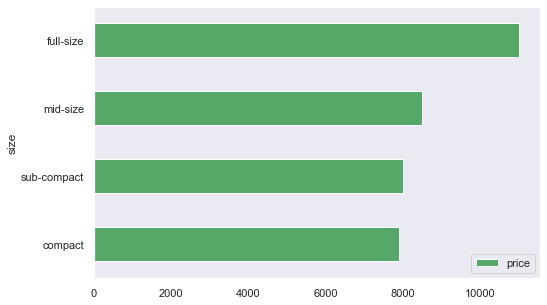

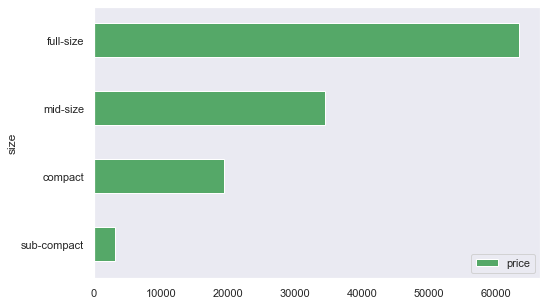

In [181]:
df2[['price','drive']].groupby(by = 'drive').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (7,5))                                                                                  
#plt.show()

df2[['price','drive']].groupby(by = 'drive').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (7,5))                                                                                  
#plt.show()

df2[['price','size']].groupby(by = 'size').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (8,5))                                                                                  
#plt.show()

df2[['price','size']].groupby(by = 'size').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (8,5))                                                                                  
plt.show()

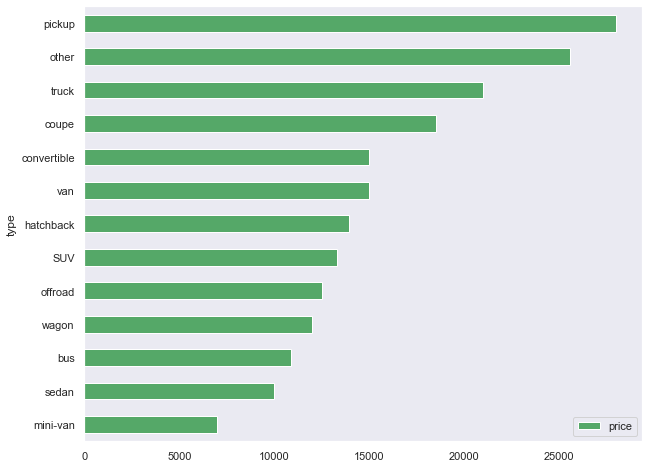

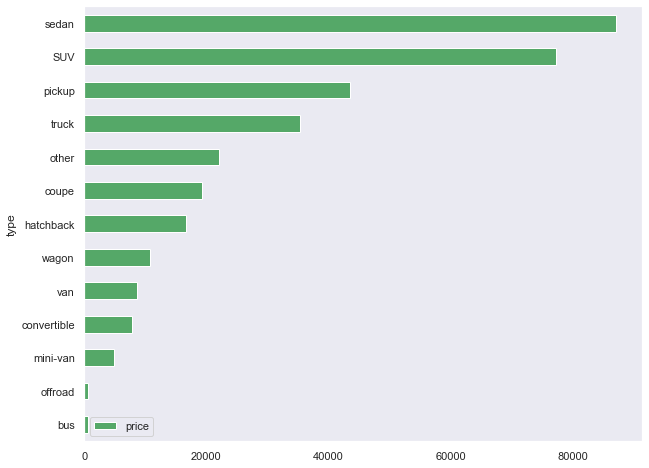

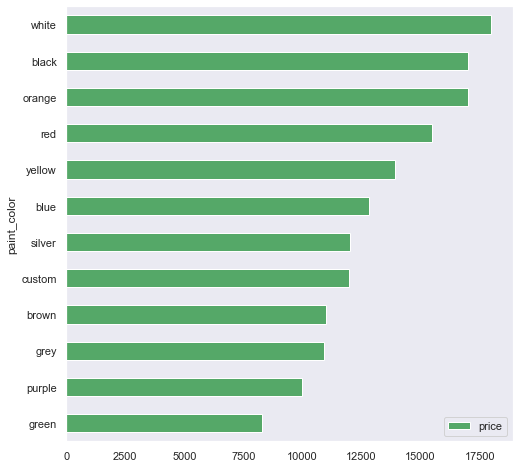

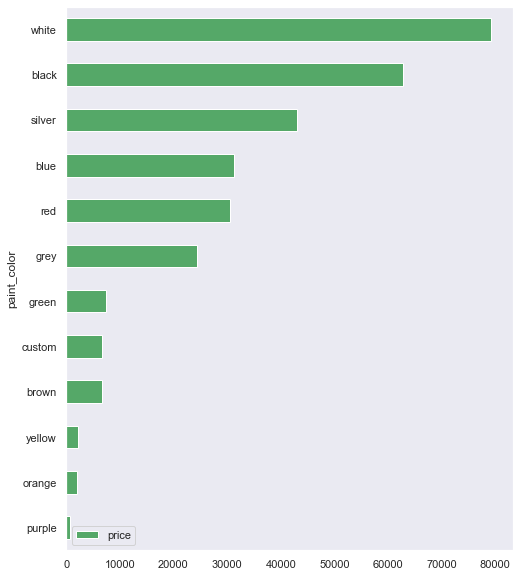

In [180]:
df2[['price','type']].groupby(by = 'type').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (10,8))                                                                                  
#plt.show()

df2[['price','type']].groupby(by = 'type').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (10,8))                                                                                  
#plt.show()

df2[['price','paint_color']].groupby(by = 'paint_color').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (8,8))                                                                                  
#plt.show()

df2[['price','paint_color']].groupby(by = 'paint_color').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (8,10))                                                                                  
plt.show()

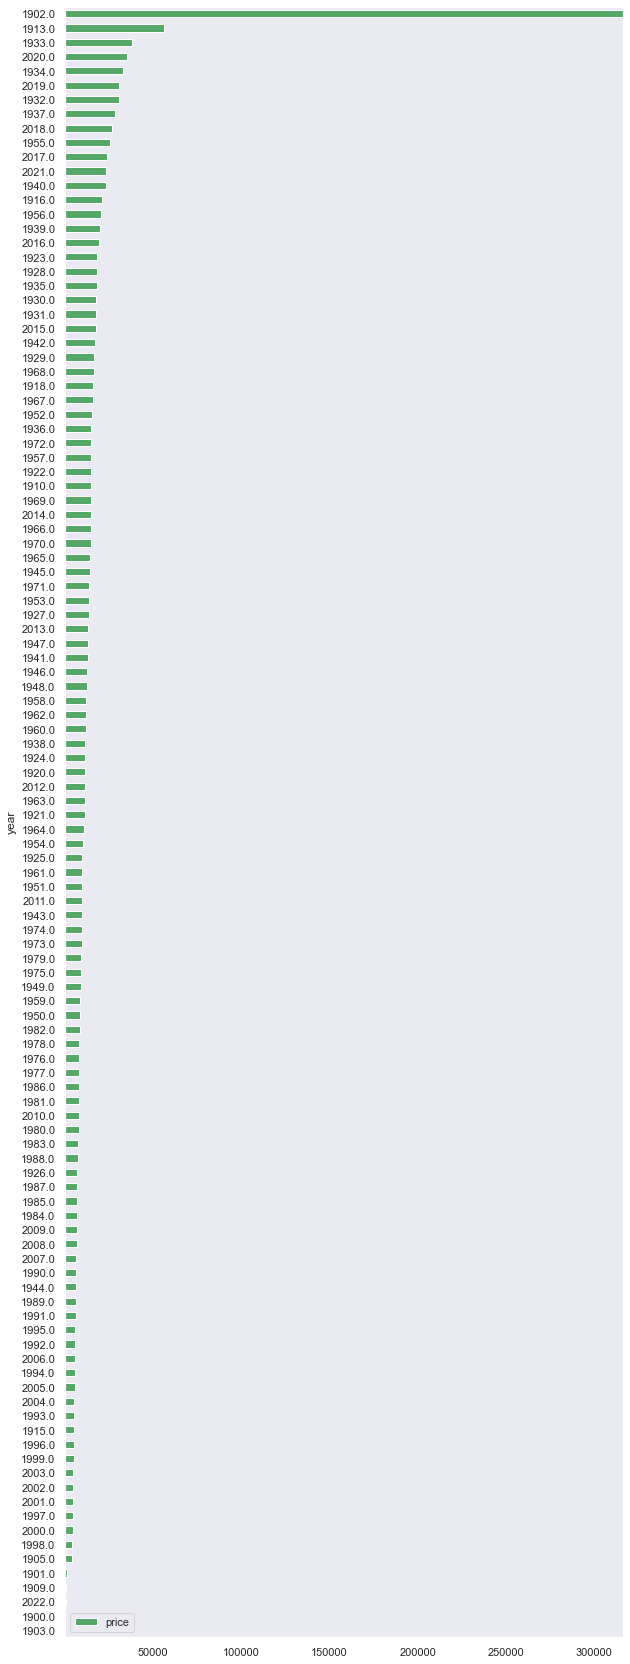

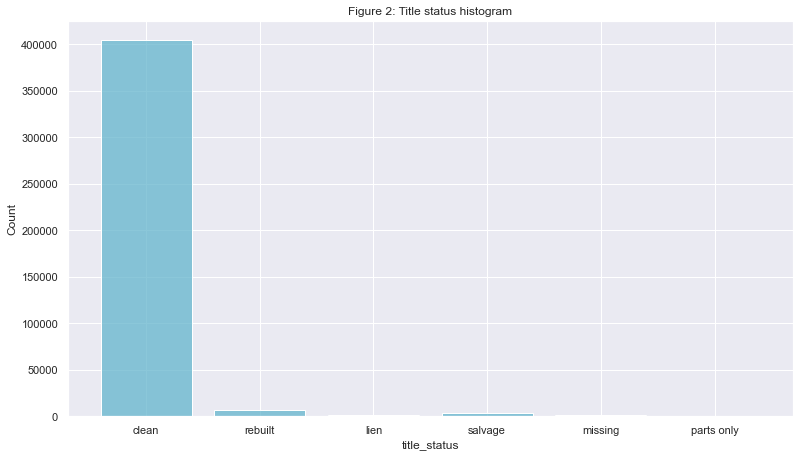

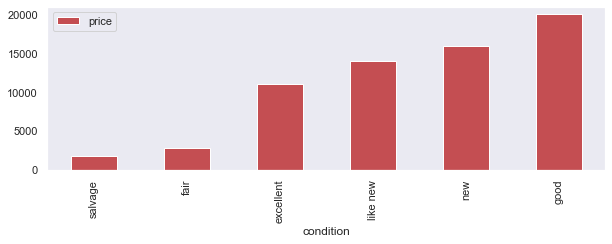

In [412]:
df2[['price','year']].groupby(by = 'year').median().sort_values("price").plot(kind = "barh",  
                                                                              color = "g", xlim=(0.18,10**5.5),figsize = (10,30))                                                                                  
#plt.show()

plt.figure(figsize = (13, 16))
plt.subplot(2,1,1)
sns.histplot(df2['title_status'], discrete=True, shrink=.8, color='c')
plt.title('Figure 2: Title status histogram')
plt.grid()
#plt.subplot(2,1,2)
#sns.countplot(x = "condition", data = df4, orient="h")
plt.show()

#condition is unreliable
df2[['price','condition']].groupby(by = 'condition').median().sort_values("price").plot(kind = "bar",
                                                                                        color = "r",figsize = (10,3))
plt.show()


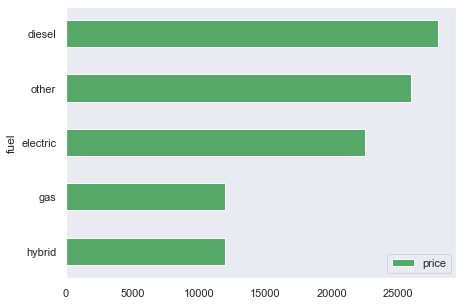

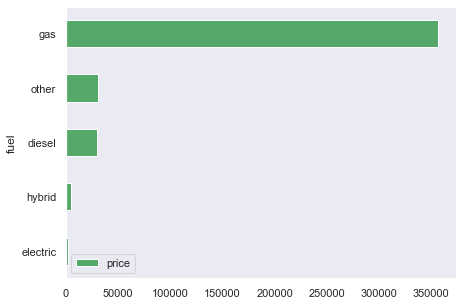

In [330]:
df2[['price','fuel']].groupby(by = 'fuel').median().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (7,5))                                                                                  
#plt.show()

df2[['price','fuel']].groupby(by = 'fuel').count().sort_values("price").plot(kind = "barh",
                                                                                     color = "g", figsize = (7,5))                                                                                  
plt.show()


In [ ]:
#check price column for clean up

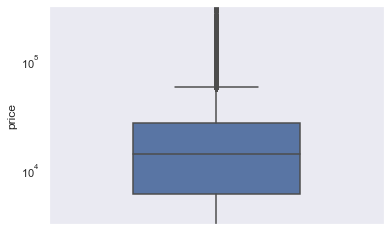

In [413]:
sns.boxplot(y = "price", data = df2,width=0.5)
plt.yscale("log")
plt.ylim(10**3.5, 10**5.5)
plt.show()

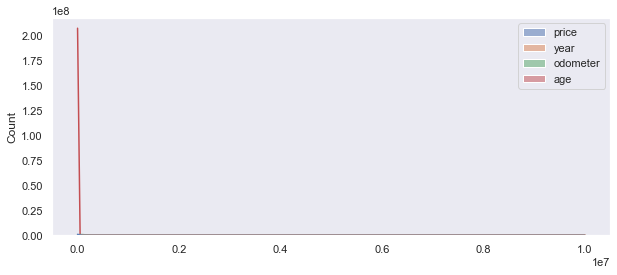

In [422]:
# data cleaning of price column: 
df4 = df2.loc[df2["price"] >= 500] 
df4 = df4.loc[df4["price"] <= 1000000]
#df3 = df3.dropna()

#forgot
# plt.figure(figsize=(10,4))
# sns.histplot(df4, kde=1, bins=30)
# #plt.xlim(0.0,1)
# plt.show()
#forgot

In [415]:
# we are using Tuckey's outlier detection method
def Tuckey_outlier_det(X):
    q1 = X.quantile(0.25)
    q3 = X.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 3*iqr
    high = q3 + 3*iqr
    return low, high

low, high = Tuckey_outlier_det(df3['price'])
print("upper & lower limit:", high, low)

upper & lower limit: 55150.0 -32700.0


In [423]:
df4 = df4.loc[df4["price"] <= high]
df4 =df4.loc[df4["price"]>=low]

print(len(df2.index))
print(len(df4.index))

426880
375651


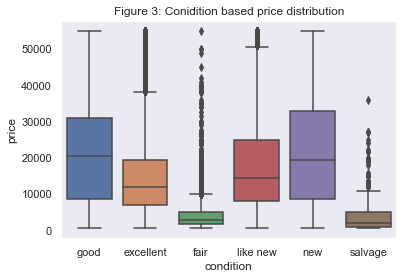

In [424]:
sns.boxplot(y = "price", x = "condition", data = df4)
plt.title("Figure 3: Conidition based price distribution")
plt.show()

In [224]:
# what are the factors influencing pricing? 
# df4[['price','cylinders']].groupby(by = 'cylinders').median().sort_values("price").plot(kind = "barh",
#                                                                                      color = "g", figsize = (24,7))
# plt.show()
# df4[['price','condition']].groupby(by = 'condition').median().sort_values("price").plot(kind = "bar",
#                                                                                      color = "r",figsize = (24,7))
# plt.show()

# df4[['price','state']].groupby(by = 'state').median().sort_values("price").plot(kind = "bar",
#                                                                                      color = "b",figsize = (24,7))
# plt.show()
# df4[['price','manufacturer']].groupby(by = 'manufacturer').median().sort_values("price").plot(kind = "bar",
#                                                                                      color = "c",figsize = (24,7))
# plt.show()

In [425]:
low_OM, high_OM = Tuckey_outlier_det(df['odometer'])
df4 = df4.loc[df4["odometer"] <= high_OM]
df4 = df4.loc[df4["odometer"] >= low_OM]

In [141]:
# plt.figure(figsize = (14,8))
# sns.scatterplot(x = "odometer", y="price", data = df4, hue = "transmission", markers=".", alpha=0.1)
# plt.show()

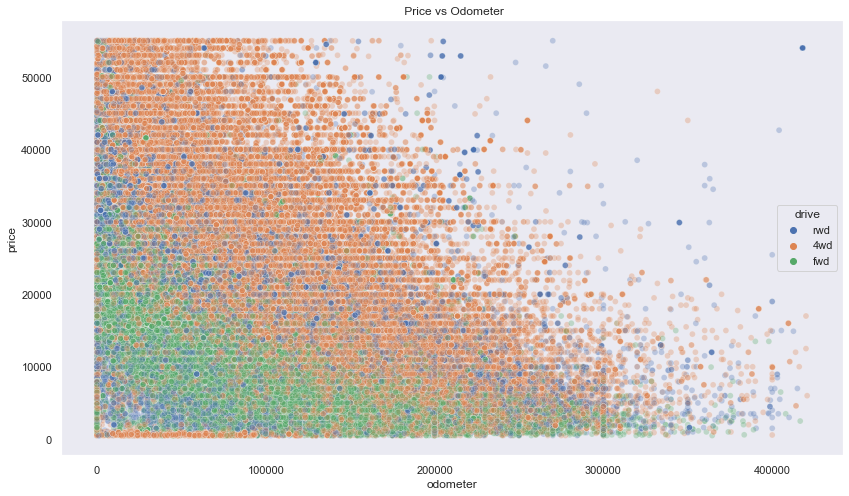

In [428]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = "odometer", y="price", data = df4, hue = "drive", markers=".", alpha=0.3)
plt.title(" Price vs Odometer")
plt.show()

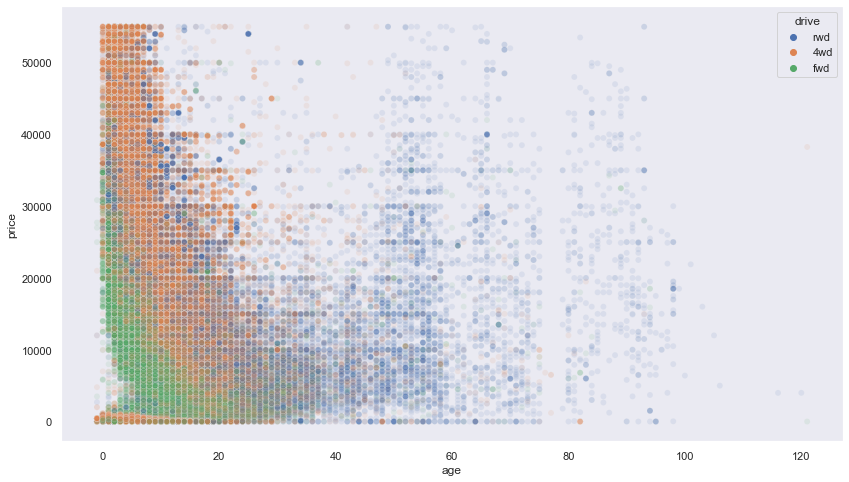

In [277]:
plt.figure(figsize = (14,8))
sns.scatterplot(x = "age", y="price", data = df4, hue = "drive", markers=".", alpha=0.1)
plt.show()

In [143]:
# plt.figure(figsize = (14,8))
# sns.scatterplot(x = "odometer", y="price", data = df4, hue = "condition", markers=".", alpha=0.1)
# plt.show()

In [235]:
#df4

In [426]:
df4.columns
#df4.dropna(inplace=True)

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'posting_date', 'age'],
      dtype='object')

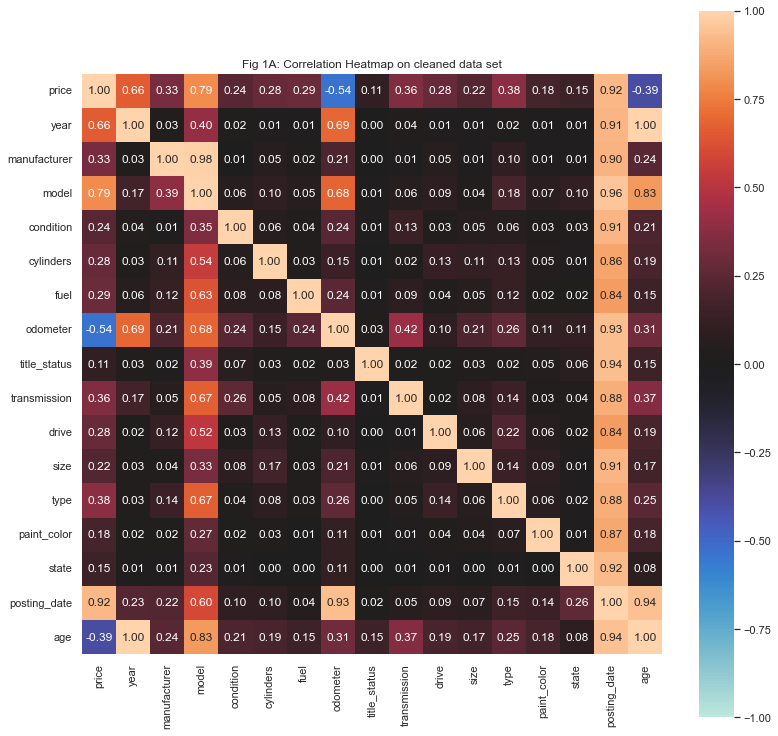

{'corr':                  price      year  manufacturer     model  condition  \
 price         1.000000  0.663463      0.330824  0.794956   0.237987   
 year          0.663463  1.000000      0.032250  0.404455   0.018407   
 manufacturer  0.330824  0.033562      1.000000  0.984556   0.006208   
 model         0.794956  0.166736      0.390020  1.000000   0.059443   
 condition     0.237987  0.044708      0.014488  0.350224   1.000000   
 cylinders     0.281907  0.028165      0.114446  0.540282   0.057467   
 fuel          0.289851  0.060840      0.119473  0.625016   0.077563   
 odometer     -0.538955  0.691635      0.209539  0.683932   0.238452   
 title_status  0.107404  0.032868      0.015429  0.387956   0.067326   
 transmission  0.358488  0.172685      0.054562  0.669224   0.257650   
 drive         0.281777  0.018605      0.122543  0.517238   0.026172   
 size          0.223338  0.033258      0.036576  0.332447   0.079120   
 type          0.375217  0.027397      0.144904  0.66699

In [431]:
#df4.drop(['region'], axis = 1,inplace=True)
categorical_features=identify_nominal_columns(df4)
associations(df4,nominal_columns=categorical_features, numerical_columns=['price','odometer','age'], 
             clustering=False, num_num_assoc='pearson', nom_nom_assoc='theil', figsize=(13, 13),
             title='Fig 1A: Correlation Heatmap on cleaned data set')

In [432]:
# y = df4[["price"]]
# #title_status
# #type,size,fuel ?
# #transmission x
# #""odometer","condition","cylinders","manufacturer","drive"

# #"fuel","title_status","type","size",
# x = df4[["odometer","year","condition","cylinders","drive","manufacturer"]]

# # categorical_features=identify_nominal_columns(x)
# # associations(x,nominal_columns=categorical_features, numerical_columns=['odometer','age'], 
# #              clustering=False, num_num_assoc='pearson', nom_nom_assoc='theil', figsize=(13, 13))


# x = pd.get_dummies(data=x, columns=["condition","cylinders",
#                                     "drive","manufacturer"], drop_first=True)
# x.head()
#here

In [433]:
# x.columns

In [435]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)
# X_train

In [436]:
# gbreg = HistGradientBoostingRegressor(loss='absolute_error', learning_rate=0.1, max_iter=5000, max_leaf_nodes = None,
#                                       max_depth = 100, min_samples_leaf=100, random_state= 101, verbose=2, 
#                                       warm_start = True) 

# gbreg.fit(X_train, y_train)
# y_pred=gbreg.predict(X_test)
# #print("Score: ",gbreg.score(X_test, y_test))

In [437]:
# print("Score: ",gbreg.score(X_test, y_test))

# fig, ax = plt.subplots()
# fig.set_size_inches(6, 6)
# ax.scatter(y_test, y_pred, alpha = 1, color = "g", s = 5)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2)
# ax.set_xlabel('Original')
# ax.set_ylabel('Predicted')
# plt.show()

In [314]:
# def wmape(predictions, targets):
#     wmape_val=np.sum(np.abs(targets - predictions))/sum(targets)
#     print("wmape error is: ", (100*wmape_val),"%")
#     return wmape_val

In [316]:
# yp = y_pred.reshape(15620, 1)

In [438]:
# plt.figure(figsize=(10,5))
# sns.histplot(yp - y_test, bins = 200, color = "g", kde = True)
# plt.xlim(-20000,20000)
# plt.show()